In [11]:
import pandas as pd
from matplotlib.offsetbox import (OffsetImage,AnnotationBbox)
import matplotlib.pyplot as plt
from mplsoccer import FontManager, add_image
from PIL import Image
import numpy as np
import os 
import difflib

In [2]:
pagina = pd.read_html("https://fbref.com/es/equipos/b8fd03ef/2022-2023/all_comps/Estadisticas-de-Manchester-City-Todas-las-competencias")

In [3]:
len(pagina)

67

In [4]:
df = pagina[0]
df.columns = ["_".join(col) if 'Unnamed' not in col[0] else col[1] for col in df.columns.values]
df.columns

Index(['Jugador', 'País', 'Posc', 'Edad', 'Tiempo Jugado_PJ',
       'Tiempo Jugado_Titular', 'Tiempo Jugado_Mín', 'Tiempo Jugado_90 s',
       'Rendimiento_Gls.', 'Rendimiento_Ass', 'Rendimiento_G+A',
       'Rendimiento_G-TP', 'Rendimiento_TP', 'Rendimiento_TPint',
       'Rendimiento_TA', 'Rendimiento_TR', 'Expectativa_xG',
       'Expectativa_npxG', 'Expectativa_xAG', 'Expectativa_npxG+xAG',
       'Progresión_PrgC', 'Progresión_PrgP', 'Progresión_PrgR',
       'Por 90 Minutos_Gls.', 'Por 90 Minutos_Ast', 'Por 90 Minutos_G+A',
       'Por 90 Minutos_G-TP', 'Por 90 Minutos_G+A-TP', 'Por 90 Minutos_xG',
       'Por 90 Minutos_xAG', 'Por 90 Minutos_xG+xAG', 'Por 90 Minutos_npxG',
       'Por 90 Minutos_npxG+xAG', 'Partidos'],
      dtype='object')

In [5]:
df["Jugador"].unique()

array(['Rodri', 'Ederson', 'Erling Haaland', 'İlkay Gündoğan',
       'Manuel Akanji', 'Kevin De Bruyne', 'Bernardo Silva',
       'Jack Grealish', 'Rúben Dias', 'Riyad Mahrez', 'Nathan Aké',
       'Kyle Walker', 'John Stones', 'Phil Foden', 'Julián Álvarez',
       'João Cancelo', 'Aymeric Laporte', 'Rico Lewis', 'Stefan Ortega',
       'Sergio Gómez', 'Cole Palmer', 'Kalvin Phillips',
       'Josh Wilson-Esbrand', 'Shea Charles', 'Máximo Perrone',
       'Scott Carson', 'Alexander Robertson', 'Claudio Gomes',
       'Ben Knight', 'Liam Delap', 'Luke Mbete-Tatu', 'Nico O’Reilly'],
      dtype=object)

In [6]:
df_plot = df[['Jugador','Rendimiento_Gls.','Expectativa_xG']]
df_plot = df_plot.iloc[:-2]
df_plot = df_plot[(df_plot['Rendimiento_Gls.'] != 0) | (df_plot['Expectativa_xG'] != 0)]
df_plot = df_plot.sort_values(by="Rendimiento_Gls.",ascending=False)
df_plot = df_plot.iloc[:16]
df_plot = df_plot.sort_values(by="Jugador")
df_plot = df_plot.dropna()

df_plot

,Jugador,Rendimiento_Gls.,Expectativa_xG
6,Bernardo Silva,7.0,3.3
20,Cole Palmer,1.0,1.5
2,Erling Haaland,52.0,39.0
7,Jack Grealish,5.0,5.6
12,John Stones,3.0,1.1
15,João Cancelo,2.0,1.1
14,Julián Álvarez,17.0,9.4
5,Kevin De Bruyne,10.0,6.8
4,Manuel Akanji,1.0,2.2
10,Nathan Aké,3.0,1.7


In [39]:
def encontrar_archivo_mas_parecido(jugador, files, threshold=0.6):
    posibles = difflib.get_close_matches(jugador, files, n=1, cutoff=threshold)
    return posibles[0] if posibles else None

path = os.getcwd()
files = os.listdir('players')
files

jugadores_filtrados = df_plot["Jugador"].tolist()
files_filtrados = []

# Recorremos los jugadores y buscamos archivos similares
for jugador in jugadores_filtrados:
    jugador_normalizado = jugador.lower().replace(" ", "_")
    archivo_similar = encontrar_archivo_mas_parecido(jugador_normalizado, files)
    if archivo_similar:
        files_filtrados.append(archivo_similar)

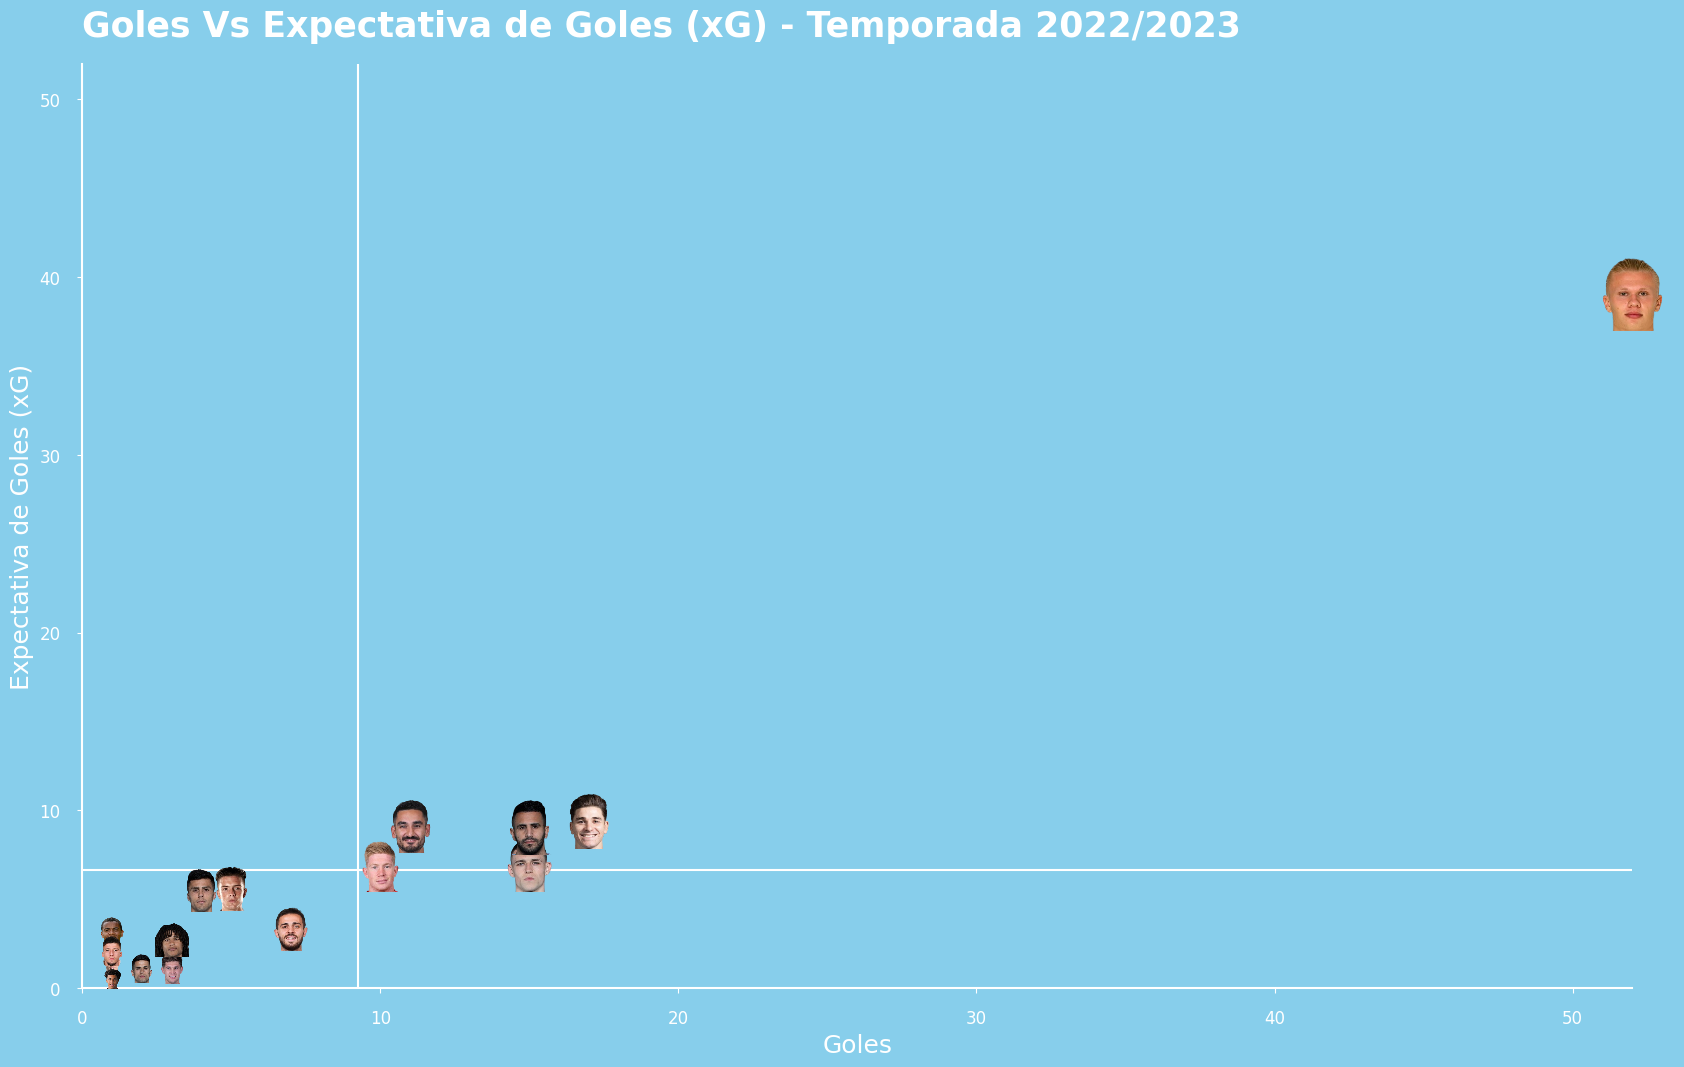

In [40]:
#Seteo los parametros del scatter
x, promx = df_plot["Rendimiento_Gls."], df_plot["Rendimiento_Gls."].mean() 
y, promy = df_plot["Expectativa_xG"], df_plot["Expectativa_xG"].mean()

#Consideraciones generales
facecolor = '#87CEEB'
color_plot = 'white'

#Figura, axis y el scatter
fig, ax = plt.subplots(figsize =(20, 12))
ax.scatter(x, y)

# Establecemos los mismos límites para ambos ejes
ax.set_xlim(0, max(x.max(), y.max()))
ax.set_ylim(0, max(x.max(), y.max()))

#Detalles esteticos
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(color_plot)
ax.spines['left'].set_color(color_plot)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
ax.yaxis.set_tick_params(pad = 12,colors=color_plot,labelsize=12)
ax.xaxis.set_tick_params(pad = 12,colors=color_plot,labelsize=12)

fig.patch.set_facecolor(facecolor)
ax.set_facecolor(facecolor)

#Lineas de Promedio
ax.axvline(promx, color=color_plot)
ax.axhline(promy, color=color_plot)

#Nombres de labels y titulo
nombreAtr1 = 'Goles'
nombreAtr2 = 'Expectativa de Goles (xG)'

ax.set_xlabel(nombreAtr1, fontsize=18,color=color_plot)
ax.set_ylabel(nombreAtr2, fontsize=18,color=color_plot)
ax.set_title(nombreAtr1+' Vs '+nombreAtr2+''+' - Temporada 2022/2023',
                     loc ='left', color=color_plot,fontsize = 25,fontweight="bold", pad=20)

#Escudos
def getImage(path, zoom=0.17):
    return OffsetImage(plt.imread(path), zoom=zoom)

# Función que ajusta el zoom según la posición (x, y)
def calcular_zoom(x, y, x_min, x_max, y_min, y_max, zoom_min=0.1, zoom_max=0.5):
    # Evitar valores de 0 (el logaritmo de 0 no está definido) y normalizar
    x_norm = (np.log1p(x - x_min)) / (np.log1p(x_max - x_min))  # np.log1p(x) = log(1 + x)
    y_norm = (np.log1p(y - y_min)) / (np.log1p(y_max - y_min))
    
    # Promediamos los valores normalizados y calculamos el zoom
    zoom = zoom_min + (x_norm + y_norm) / 2 * (zoom_max - zoom_min)
    
    return zoom

# Encontramos los valores mínimo y máximo de x e y
x_min, x_max = x.min(), x.max()
y_min, y_max = y.min(), y.max()

# Función para verificar la distancia mínima entre puntos y ajustar si es necesario
def ajustar_solapamiento(x0, y0, puntos_existentes, min_distancia=1.0):
    for (xp, yp) in puntos_existentes:
        distancia = np.sqrt((x0 - xp)**2 + (y0 - yp)**2)
        if distancia < min_distancia:
            # Aplicar un desplazamiento controlado
            x0 += min_distancia * (x0 - xp) / distancia
            y0 += min_distancia * (y0 - yp) / distancia
    return x0, y0

# Lista para almacenar las posiciones ya utilizadas
puntos_existentes = []

# Escudos con ajuste de posición para evitar solapamientos
for x0, y0, file in zip(x, y, files_filtrados):
    # Calcular el zoom en función de la posición (x0, y0)
    zoom = calcular_zoom(x0, y0, x_min, x_max, y_min, y_max, zoom_min=0.1, zoom_max=0.35)
    
    # Ajustar la posición si está demasiado cerca de otros puntos
    x0_mod, y0_mod = ajustar_solapamiento(x0, y0, puntos_existentes, min_distancia=1.0)
    
    # Guardar la posición ajustada
    puntos_existentes.append((x0_mod, y0_mod))
    
    # Añadir la imagen ajustada al gráfico
    ab = AnnotationBbox(getImage(f'players/{file}', zoom=zoom), (x0_mod, y0_mod), frameon=False)
    ax.add_artist(ab)

In [9]:
pagina[4].head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
             Jugador               País               Posc               Edad   
0            Ederson             br BRA                 PO               28.0   
1              Rodri             es ESP                 CC               26.0   
2     Erling Haaland             no NOR                 DL               22.0   
3    Kevin De Bruyne             be BEL                 CC               31.0   
4     İlkay Gündoğan             de GER                 CC               31.0   

  Unnamed: 4_level_0 Estándar                         ...                    \
                90 s     Gls.  Dis DaP % de TT  T/90  ...  Dist FK TP TPint   
0               35.0        0    0   0     NaN  0.00  ...   NaN  0  0     0   
1               32.3        2   50  14    28.0  1.55  ...  17.1  0  0     0   
2               30.8       36  116  53    45.7  3.77  ...  12.6  0  7     7   
3               26.9        7   65  21    32.3  2.42  ...  23.0  7  0     0   
4               26.1        8   53  20    37.7  2.03  ...  18.1  5  0     1   

  Expectativa                            Unnamed: 22_level_0  
           xG  npxG npxG/Sh G-xG np:G-xG            Partidos  
0         0.0   0.0     NaN  0.0     0.0            Partidos  
1         4.6   4.6    0.09 -2.6    -2.6            Partidos  
2        28.4  23.0    0.20  7.6     6.0            Partidos  
3         5.6   5.6    0.09  1.4     1.4            Partidos  
4         7.5   6.7    0.13  0.5     1.3            Partidos  

[5 rows x 23 columns]

In [10]:
pagina[5].head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
             Jugador               País               Posc               Edad   
0            Ederson             br BRA                 PO               28.0   
1              Rodri             es ESP                 CC               26.0   
2     Erling Haaland             no NOR                 DL               22.0   
3    Kevin De Bruyne             be BEL                 CC               31.0   
4     İlkay Gündoğan             de GER                 CC               31.0   

  Unnamed: 4_level_0 Total                                    ...  \
                90 s   Cmp  Int. % Cmp Dist. tot. Dist. prg.  ...   
0               35.0  1079  1257  85.8      26248      17275  ...   
1               32.3  2723  2987  91.2      49949      11936  ...   
2               30.8   360   500  72.0       4403        947  ...   
3               26.9  1192  1626  73.3      22165       6516  ...   
4               26.1  1374  1578  87.1      21396       4941  ...   

  Unnamed: 19_level_0 Unnamed: 20_level_0 Expectativa        \
                  Ass                 xAG          xA A-xAG   
0                   1                 0.2         0.2   0.8   
1                   6                 4.1         3.5   1.9   
2                   8                 5.3         3.1   2.7   
3                  16                13.7        14.1   2.3   
4                   4                 3.3         4.4   0.7   

  Unnamed: 23_level_0 Unnamed: 24_level_0 Unnamed: 25_level_0  \
                   PC                 1/3                 PPA   
0                   1                  13                   0   
1                  32                 265                  33   
2                  29                  14                  23   
3                  96                 124                  96   
4                  37                 143                  35   

  Unnamed: 26_level_0 Unnamed: 27_level_0 Unnamed: 28_level_0  
                 CrAP                PrgP            Partidos  
0                   0                   0            Partidos  
1                   3                 260            Partidos  
2                   0                  58            Partidos  
3                  21                 246            Partidos  
4                   1                 170            Partidos  

[5 rows x 29 columns]

In [11]:
pagina[6].head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
             Jugador               País               Posc               Edad   
0            Ederson             br BRA                 PO               28.0   
1              Rodri             es ESP                 CC               26.0   
2     Erling Haaland             no NOR                 DL               22.0   
3    Kevin De Bruyne             be BEL                 CC               31.0   
4     İlkay Gündoğan             de GER                 CC               31.0   

  Unnamed: 4_level_0 Unnamed: 5_level_0 Tipos de pases                       \
                90 s               Int.     Balón vivo Balón muerto  FK  PL   
0               35.0               1257           1049          207  55   1   
1               32.3               2987           2943           43  37   2   
2               30.8                500            449           45   0   4   
3               26.9               1626           1454          160  53  28   
4               26.1               1578           1519           56  24  18   

   ...                Saques de esquina             Resultados               \
   ...  Pcz Lanz.  SE            Dentro Fuera Rect.        Cmp  PA Bloqueos   
0  ...    0     0   0                 0     0     0       1079   1        1   
1  ...    6     3   0                 0     0     0       2723   1       21   
2  ...   12     2   1                 0     0     0        360   6       21   
3  ...  226    31  72                20    32     6       1192  12       41   
4  ...   30     5  21                 7     4     1       1374   3       27   

  Unnamed: 20_level_0  
             Partidos  
0            Partidos  
1            Partidos  
2            Partidos  
3            Partidos  
4            Partidos  

[5 rows x 21 columns]

In [12]:
pagina[7].head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
             Jugador               País               Posc               Edad   
0            Ederson             br BRA                 PO               28.0   
1              Rodri             es ESP                 CC               26.0   
2     Erling Haaland             no NOR                 DL               22.0   
3    Kevin De Bruyne             be BEL                 CC               31.0   
4     İlkay Gündoğan             de GER                 CC               31.0   

  Unnamed: 4_level_0  ACT       Tipos de SCA                 ...     ACG  \
                90 s  ACT SCA90     PassLive PassDead HASTA  ... Def ACG   
0               35.0    2  0.06            2        0     0  ...   0   1   
1               32.3   92  2.84           80        0     4  ...   1  10   
2               30.8   72  2.34           48        0     5  ...   1  17   
3               26.9  176  6.55          120       33     8  ...   3  31   
4               26.1   90  3.44           71        7     2  ...   2  17   

        Tipos de GCA                           Unnamed: 21_level_0  
  GCA90     PassLive PassDead HASTA Dis FR Def            Partidos  
0  0.03            1        0     0   0  0   0            Partidos  
1  0.31           10        0     0   0  0   0            Partidos  
2  0.55           14        0     0   1  2   0            Partidos  
3  1.15           24        3     1   1  2   0            Partidos  
4  0.65           13        1     0   1  2   0            Partidos  

[5 rows x 22 columns]

In [13]:
pagina[8].head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
             Jugador               País               Posc               Edad   
0            Ederson             br BRA                 PO               28.0   
1              Rodri             es ESP                 CC               26.0   
2     Erling Haaland             no NOR                 DL               22.0   
3    Kevin De Bruyne             be BEL                 CC               31.0   
4     İlkay Gündoğan             de GER                 CC               31.0   

  Unnamed: 4_level_0 Derribos                                    ... Desafíos  \
                90 s      Tkl TklG 3.º def. 3.º cent. 3.º ataq.  ...     Tkl%   
0               35.0        3    1        3         0         0  ...     50.0   
1               32.3       67   41       28        28        11  ...     49.1   
2               30.8        3    2        0         2         1  ...     20.0   
3               26.9       28   12        3        12        13  ...     35.9   
4               26.1       30   18        7        13        10  ...     35.3   

          Bloqueos           Unnamed: 17_level_0 Unnamed: 18_level_0  \
  Pérdida Bloqueos Dis Pases                 Int             Tkl+Int   
0       1        0   0     0                   1                   4   
1      27       40  14    26                  33                 100   
2       4       12   4     8                   3                   6   
3      25       27   2    25                   9                  37   
4      22       18   3    15                  20                  50   

  Unnamed: 19_level_0 Unnamed: 20_level_0 Unnamed: 21_level_0  
                Desp.                 Err            Partidos  
0                  10                   2            Partidos  
1                  43                   1            Partidos  
2                  14                   0            Partidos  
3                  10                   0            Partidos  
4                  13                   0            Partidos  

[5 rows x 22 columns]

In [14]:
pagina[9].head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
             Jugador               País               Posc               Edad   
0            Ederson             br BRA                 PO               28.0   
1              Rodri             es ESP                 CC               26.0   
2     Erling Haaland             no NOR                 DL               22.0   
3    Kevin De Bruyne             be BEL                 CC               31.0   
4     İlkay Gündoğan             de GER                 CC               31.0   

  Unnamed: 4_level_0 Toques                                         ...  \
                90 s Toques Def. pen. 3.º def. 3.º cent. 3.º ataq.  ...   
0               35.0   1302      1049     1295         9         0  ...   
1               32.3   3272       119      706      1993       592  ...   
2               30.8    763        18       39       290       435  ...   
3               26.9   1860        13      100       743      1041  ...   
4               26.1   1806        31      243       975       596  ...   

  Transportes                                                Recepción       \
   Dist. tot. Dist. prg. PrgC 1/3 TAP Errores de control Des       Rec PrgR   
0        4059       2429    0   0   0                  0   0       833    0   
1       10293       5622   76  72   3                 21  19      2511   37   
2        2020        761   35  10  25                 51  26       583  151   
3        5721       3415  100  81  16                 42  29      1445  245   
4        5457       2628   53  44   7                 28  27      1425  124   

  Unnamed: 27_level_0  
             Partidos  
0            Partidos  
1            Partidos  
2            Partidos  
3            Partidos  
4            Partidos  

[5 rows x 28 columns]

In [15]:
pagina[9].head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
             Jugador               País               Posc               Edad   
0            Ederson             br BRA                 PO               28.0   
1              Rodri             es ESP                 CC               26.0   
2     Erling Haaland             no NOR                 DL               22.0   
3    Kevin De Bruyne             be BEL                 CC               31.0   
4     İlkay Gündoğan             de GER                 CC               31.0   

  Unnamed: 4_level_0 Toques                                         ...  \
                90 s Toques Def. pen. 3.º def. 3.º cent. 3.º ataq.  ...   
0               35.0   1302      1049     1295         9         0  ...   
1               32.3   3272       119      706      1993       592  ...   
2               30.8    763        18       39       290       435  ...   
3               26.9   1860        13      100       743      1041  ...   
4               26.1   1806        31      243       975       596  ...   

  Transportes                                                Recepción       \
   Dist. tot. Dist. prg. PrgC 1/3 TAP Errores de control Des       Rec PrgR   
0        4059       2429    0   0   0                  0   0       833    0   
1       10293       5622   76  72   3                 21  19      2511   37   
2        2020        761   35  10  25                 51  26       583  151   
3        5721       3415  100  81  16                 42  29      1445  245   
4        5457       2628   53  44   7                 28  27      1425  124   

  Unnamed: 27_level_0  
             Partidos  
0            Partidos  
1            Partidos  
2            Partidos  
3            Partidos  
4            Partidos  

[5 rows x 28 columns]

In [16]:
pagina[10].head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
             Jugador               País               Posc               Edad   
0            Ederson             br BRA                 PO               28.0   
1              Rodri             es ESP                 CC               26.0   
2     Erling Haaland             no NOR                 DL               22.0   
3    Kevin De Bruyne             be BEL                 CC               31.0   
4     İlkay Gündoğan             de GER                 CC               31.0   

  Unnamed: 4_level_0 Tiempo Jugado                   Titular  ...  \
                  PJ           Mín Mn/PJ % min  90 s Titular  ...   
0                 35        3150.0  90.0  92.1  35.0      35  ...   
1                 36        2911.0  81.0  85.1  32.3      34  ...   
2                 35        2769.0  79.0  81.0  30.8      33  ...   
3                 32        2417.0  76.0  70.7  26.9      28  ...   
4                 31        2353.0  76.0  68.8  26.1      27  ...   

  Logros del equipo                          Logros del equipo (xG)        \
               onGA   +/- +/-90 Dentro-Fuera                   onxG onxGA   
0              32.0  57.0  1.63         0.30                   73.3  28.3   
1              26.0  57.0  1.76         1.06                   67.4  24.4   
2              26.0  58.0  1.89         1.47                   66.9  24.3   
3              23.0  46.0  1.71         0.37                   58.7  19.4   
4              20.0  51.0  1.95         1.11                   61.3  19.4   

                             Unnamed: 26_level_0  
  xG+/- xG+/-90 Dentro-Fuera            Partidos  
0  45.1    1.29         0.81            Partidos  
1  43.0    1.33         0.71            Partidos  
2  42.6    1.38         0.84            Partidos  
3  39.2    1.46         0.81            Partidos  
4  41.9    1.60         1.21            Partidos  

[5 rows x 27 columns]

In [17]:
pagina[11].head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
             Jugador               País               Posc               Edad   
0            Ederson             br BRA                 PO               28.0   
1              Rodri             es ESP                 CC               26.0   
2     Erling Haaland             no NOR                 DL               22.0   
3    Kevin De Bruyne             be BEL                 CC               31.0   
4     İlkay Gündoğan             de GER                 CC               31.0   

  Unnamed: 4_level_0 Rendimiento                         ...           \
                90 s          TA TR 2a amarilla Fls  FR  ... Int TklG   
0               35.0           3  0           0   1   4  ...   1    1   
1               32.3           5  0           0  47  20  ...  33   41   
2               30.8           5  0           0  31  24  ...   3    2   
3               26.9           1  0           0  20  29  ...   9   12   
4               26.1           0  0           0  23  25  ...  20   18   

                                            Duelos aéreos           \
  Penal ejecutado Penal concedido GC Recup.       Ganados Perdidos   
0               0               1  0     35             8        1   
1               0               0  0    301            72       32   
2               1               0  0     37            50       50   
3               2               0  0     97            13       13   
4               2               0  0    155            19       12   

               Unnamed: 21_level_0  
  % de ganados            Partidos  
0         88.9            Partidos  
1         69.2            Partidos  
2         50.0            Partidos  
3         50.0            Partidos  
4         61.3            Partidos  

[5 rows x 22 columns]

In [18]:
pagina[12].head()

,RL,Equipo,PJ,PG,PE,PP,GF,GC,DG,Pts,Pts/PJ,xG,xGA,xGD,xGD/90,Asistencia,Máximo Goleador del Equipo,Portero,Notas
0,1,Manchester City,38,28,5,5,94,33,61,89,2.34,78.6,32.1,46.5,1.22,53249,Erling Haaland - 36,Ederson,→ Champions League Por el final de liga
1,2,Arsenal,38,26,6,6,88,43,45,84,2.21,71.6,42.0,29.6,0.78,60191,"Martin Ødegaard, Gabriel Martinelli - 15",Aaron Ramsdale,→ Champions League Por el final de liga
2,3,Manchester Utd,38,23,6,9,58,43,15,75,1.97,67.7,50.4,17.3,0.45,73671,Marcus Rashford - 17,David de Gea,→ Champions League Por el final de liga


In [19]:
pagina[13].head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Local                            ...  \
                  RL             Equipo    PJ  PG PE PP  GF  GC  DG Pts  ...   
0                  1    Manchester City    19  17  1  1  60  17  43  52  ...   
1                  2            Arsenal    19  14  3  2  53  25  28  45  ...   
2                  3     Manchester Utd    19  15  3  1  36  10  26  48  ...   

  Visitante                                                  
         PP  GF  GC  DG Pts Pts/PJ    xG   xGA   xGD xGD/90  
0         4  34  16  18  37   1.95  35.9  19.3  16.6   0.87  
1         4  35  18  17  39   2.05  29.1  22.7   6.4   0.34  
2         8  22  33 -11  27   1.42  26.7  31.0  -4.3  -0.22  

[3 rows x 28 columns]